
# Partie 1 — Statistique univariée  




##  Objectifs pédagogiques

À la fin de cette partie, vous serez capables de :

- calculer et interpréter les **mesures de tendance centrale** : moyenne, médiane, mode ;
- calculer et interpréter les **mesures de dispersion** : variance, écart-type, étendue, coefficient de variation ;
- utiliser les **quartiles** et l’**IQR** pour détecter des valeurs extrêmes (outliers) ;
- analyser la **forme d’une distribution** (asymétrie / skewness, aplatissement / kurtosis) ;
- décrire une **variable qualitative** avec des effectifs, proportions et graphiques ;
- utiliser des **tests de normalité** (Shapiro-Wilk, Kolmogorov–Smirnov) et un **Q-Q plot** ;
- décider s’il est raisonnable de supposer la **normalité** d’une variable.


In [1]:

# Imports de base

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Optionnel : pour des graphiques un peu plus jolis si installé
try:
    import seaborn as sns
    sns.set(style="whitegrid")
except ImportError:
    sns = None

# Affichage plus lisible
pd.set_option("display.max_columns", None)


In [2]:

#  Chargement du jeu de données e-commerce
# Assurez-vous que le fichier `ecommerce_dataset.csv` se trouve dans le même dossier que ce notebook.

df = pd.read_csv("ecommerce_dataset.csv")
df.head()


,client_id,sexe,âge,revenu_mensuel,segment_age,revenu_cat,produit,canal_achat,montant_panier,panier_frequent,note_satisfaction,retour_produit,date_achat
0,1,Homme,50,3893.70,Mature,Moyen,Sport,Mobile,83.27,Non,2,Non,2023-05-28
1,2,Femme,39,2885.15,Adulte,Moyen,Électronique,Mobile,47.18,Oui,3,Non,2023-01-13
2,3,Homme,44,2369.53,Mature,Moyen,Sport,Mobile,72.28,Oui,4,Non,2023-03-13
3,4,Homme,38,3197.92,Adulte,Moyen,Électronique,Mobile,54.59,Non,3,Non,2023-05-07
4,5,Homme,20,3774.66,Jeune,Moyen,Sport,Mobile,75.30,Non,4,Non,2023-07-04


In [3]:

# Aperçu rapide de la structure du jeu de données
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   client_id          15000 non-null  int64  
 1   sexe               15000 non-null  object 
 2   âge                15000 non-null  int64  
 3   revenu_mensuel     15000 non-null  float64
 4   segment_age        15000 non-null  object 
 5   revenu_cat         15000 non-null  object 
 6   produit            15000 non-null  object 
 7   canal_achat        15000 non-null  object 
 8   montant_panier     15000 non-null  float64
 9   panier_frequent    15000 non-null  object 
 10  note_satisfaction  15000 non-null  int64  
 11  retour_produit     15000 non-null  object 
 12  date_achat         15000 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 1.5+ MB



Nous allons principalement utiliser dans ce notebook :

- des **variables quantitatives** : `âge`, `revenu_mensuel`, `montant_panier`, `note_satisfaction` ;
- des **variables qualitatives** : `sexe`, `segment_age`, `revenu_cat`, `produit`, `canal_achat`, `panier_frequent`, `retour_produit`.




## Variable quantitative

Une **variable quantitative** prend des valeurs numériques (ex. : âge, revenu, montant du panier).  
On distingue :
- les variables **continues** (peuvent prendre une infinité de valeurs dans un intervalle) ;
- les variables **discrètes** (valeurs entières, ex. nombre d’enfants).



Une **variable quantitative** est une variable numérique.  
Voici l’ensemble des analyses univariées possibles.

#  Analyse univariée des variables quantitatives  


Une variable quantitative peut être résumée selon plusieurs axes :  
**tendance centrale**, **dispersion**, **position**, **forme**, **visualisation**



| **Catégorie** | **Indicateurs / Outils** | **Description / Interprétation** |
|---------------|---------------------------|----------------------------------|
| **Tendance centrale** | **Moyenne** | Niveau moyen de la variable |
| | **Médiane** | Valeur centrale (50% en dessous, 50% au-dessus) |
| | **Mode** | Valeur la plus fréquente |
| **Dispersion** | **Variance** | Dispersion autour de la moyenne |
| | **Écart-type** | Variabilité typique (racine de la variance) |
| | **Étendue (Range)** | max − min |
| | **Coefficient de variation (CV)** | Variation relative : écart-type ÷ moyenne |
| **Position** | **Quartiles (Q1, Q2, Q3)** | Coupent la distribution en 4 parties |
| | **Quantiles (déciles, percentiles)** | Découpages plus fins de la distribution |
| | **IQR (Interquartile Range)** | Q3 − Q1, dispersion robuste |
| | **Bornes outliers** | Q1 − 1.5×IQR ; Q3 + 1.5×IQR |
| **Forme de la distribution** | **Skewness (asymétrie)** | >0 queue droite ; <0 queue gauche |
| | **Kurtosis (aplatissement)** | >0 pointue ; <0 plate ; ≈0 proche normale |
| **Visualisations** | **Histogramme** | Répartition par classes |
| | **KDE (densité)** | Courbe lissée de la distribution |
| | **Boxplot** | Quartiles + outliers |
| | **Violin plot** | Boxplot + densité |
| | **Line plot** | Évolution temporelle si données chronologiques |




##  À retenir  
Une analyse univariée quantitative répond à 5 questions clés :

1. **Quel est le niveau moyen ?** → moyenne, médiane  
2. **Quelle est la variabilité ?** → variance, écart-type, étendue  
3. **Comment se répartissent les observations ?** → quartiles, quantiles, IQR  
4. **Quelle est la forme de la distribution ?** → skewness, kurtosis  
5. **Comment visualiser efficacement ?** → histogramme, KDE, boxplot


In [4]:

# On extrait la variable quantitative à analyser
variable = "montant_panier"
serie = df[variable].dropna()

serie.describe()


count    15000.000000
mean        93.357107
std         66.260809
min         10.320000
25%         48.310000
50%         73.530000
75%        117.295000
max        929.970000
Name: montant_panier, dtype: float64


###  Mesures de tendance centrale

Les mesures de tendance centrale résument le **niveau "moyen"** de la variable.

- **Moyenne** :  
  $$\bar{x} = \frac{1}{n} \sum_{i=1}^n x_i$$
- **Médiane** : valeur qui coupe la distribution en deux parties égales (50% des valeurs en dessous, 50% au-dessus).
- **Mode** : valeur la plus fréquente (surtout utile pour les distributions discrètes ou qualitatives).


In [5]:

# ⚙️Calculs en Python

mean_value = serie.mean()
median_value = serie.median()
mode_values = serie.mode()  # peut retourner plusieurs valeurs

print(f"Moyenne : {mean_value:.2f}")
print(f"Médiane : {median_value:.2f}")
print("Mode(s) :")
print(mode_values)


Moyenne : 93.36
Médiane : 73.53
Mode(s) :
0    62.12
Name: montant_panier, dtype: float64



**Interprétation :**
- Si la moyenne et la médiane sont proches, la distribution est souvent relativement **symétrique**.
- Si la moyenne est nettement > médiane → asymétrie à droite (queue à droite).  
- Si la moyenne est nettement < médiane → asymétrie à gauche.



###   Mesures de dispersion

Les mesures de dispersion indiquent **à quel point les valeurs sont dispersées autour de la moyenne**.

- **Variance** :  
  $$s^2 = \frac{1}{n-1} \sum_{i=1}^n (x_i - \bar{x})^2$$
- **Écart-type** : racine carrée de la variance  
  $$s = \sqrt{s^2}$$
- **Étendue** : max - min  
- **Coefficient de variation (CV)** :  
  $$CV = \frac{s}{\bar{x}} \times 100\%$$  
  Permet de comparer la dispersion **relativement** à la moyenne.


In [6]:

# ⚙️ Calcul de la variance, de l'écart-type, de l'étendue et du CV

variance = serie.var(ddof=1)          # variance empirique
std_dev = serie.std(ddof=1)           # écart-type
vmin = serie.min()
vmax = serie.max()
etendue = vmax - vmin
cv = (std_dev / mean_value) * 100

print(f"Variance : {variance:.2f}")
print(f"Écart-type : {std_dev:.2f}")
print(f"Min : {vmin:.2f}")
print(f"Max : {vmax:.2f}")
print(f"Étendue : {etendue:.2f}")
print(f"Coefficient de variation : {cv:.2f} %")


Variance : 4390.49
Écart-type : 66.26
Min : 10.32
Max : 929.97
Étendue : 919.65
Coefficient de variation : 70.98 %



###  Quartiles, quantiles, IQR et outliers

Pour analyser la répartition d’une variable quantitative, on utilise des **mesures de position** : quartiles, quantiles, IQR et bornes d’outliers.



##  **Quartiles (Q1, Q2, Q3)**  
Les quartiles découpent la distribution en **4 segments de même effectif** :

- **Q1 (1er quartile)** : 25% des valeurs sont en dessous  
- **Q2 (médiane)** : 50% des valeurs sont en dessous  
- **Q3 (3e quartile)** : 75% des valeurs sont en dessous  

Ils permettent de comprendre **où se concentre la majorité des données**.


##  **Quantiles (déciles, percentiles)**  
Les quantiles généralisent les quartiles en découpant la distribution en **k parties égales**.

- **Déciles (D1, D2, …, D9)** → 10 segments  
- **Percentiles (P1 à P99)** → 100 segments  

Utile pour analyser des données très dispersées ou pour créer des groupes (segmentation, scoring, etc.).



## **IQR (Interquartile Range)**  
L’IQR mesure la dispersion centrale des données :

\[
IQR = Q_3 - Q_1
\]

- Zone contenant **50% des valeurs centrales**  
- Mesure **robuste**, peu sensible aux valeurs extrêmes  

Plus l’IQR est grand → plus la variable est dispersée au centre.


##  **Détection des outliers (valeurs extrêmes)**  
Les valeurs extrêmes peuvent être identifiées à l’aide des **bornes de Tukey** :

- **Borne inférieure** :  
  \[
  Q_1 - 1.5 \times IQR
  \]

- **Borne supérieure** :  
  \[
  Q_3 + 1.5 \times IQR
  \]

Toute valeur située **en dehors de ces bornes** est considérée comme un *outlier* potentiel.

Cette approche est celle utilisée dans les **boxplots**.



## En résumé 

| **Indicateur** | **Définition** | **Utilité** |
|---------------|----------------|--------------|
| **Quartiles (Q1, Q2, Q3)** | Découpent les données en 4 parties | Comprendre la position des valeurs |
| **Quantiles** | Découpent les données en k parties (déciles, percentiles) | Analyse plus fine des répartitions |
| **IQR** | \(Q_3 - Q_1\) | Mesure robuste de dispersion |
| **Bornes outliers** | \(Q_1 - 1.5×IQR\), \(Q_3 + 1.5×IQR\) | Détection des valeurs extrêmes |




In [7]:

# ⚙️ Calcul des quartiles, de l'IQR et des bornes pour détecter les outliers

q1 = serie.quantile(0.25)
q2 = serie.quantile(0.50)
q3 = serie.quantile(0.75)
iqr = q3 - q1

borne_inf = q1 - 1.5 * iqr
borne_sup = q3 + 1.5 * iqr

print(f"Q1 : {q1:.2f}")
print(f"Q2 (médiane) : {q2:.2f}")
print(f"Q3 : {q3:.2f}")
print(f"IQR : {iqr:.2f}")
print(f"Borne inférieure (outliers) : {borne_inf:.2f}")
print(f"Borne supérieure (outliers) : {borne_sup:.2f}")

outliers = serie[(serie < borne_inf) | (serie > borne_sup)]
print(f"\nNombre d'outliers détectés : {outliers.shape[0]}")


Q1 : 48.31
Q2 (médiane) : 73.53
Q3 : 117.30
IQR : 68.98
Borne inférieure (outliers) : -55.17
Borne supérieure (outliers) : 220.77

Nombre d'outliers détectés : 813



### Forme de la distribution : asymétrie et aplatissement

Deux indicateurs classiques :

- **Asymétrie (skewness)** : mesure la symétrie de la distribution.  
  - skewness ≈ 0 → distribution à peu près symétrique ;  
  - skewness > 0 → queue à droite ;  
  - skewness < 0 → queue à gauche.

- **Aplatissement (kurtosis)** : mesure la forme des queues de distribution.  
  - kurtosis ≈ 0 (en version « excess kurtosis ») → proche de la loi normale ;  
  - kurtosis > 0 → distribution plus « pointue », queues plus lourdes ;  
  - kurtosis < 0 → distribution plus « plate ».


In [8]:

# ⚙️ Calcul de l'asymétrie et de l'aplatissement

skewness = serie.skew()
kurtosis = serie.kurtosis()  # kurtosis "excess" (0 si normale théorique)

print(f"Skewness (asymétrie) : {skewness:.3f}")
print(f"Kurtosis (aplatissement) : {kurtosis:.3f}")


Skewness (asymétrie) : 2.150
Kurtosis (aplatissement) : 7.737



### Visualisations (histogramme, KDE, boxplot)

Les graphiques permettent de **voir** la distribution :

- **Histogramme** : fréquence des valeurs dans des classes ;
- **KDE (Kernel Density Estimation)** : estimation lissée de la densité ;
- **Boxplot** : résumé visuel (médiane, quartiles, outliers).


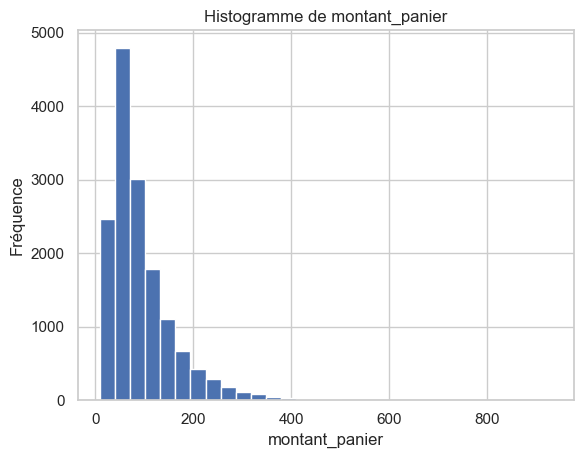

In [9]:

#  Histogramme

plt.figure()
plt.hist(serie, bins=30)
plt.title(f"Histogramme de {variable}")
plt.xlabel(variable)
plt.ylabel("Fréquence")
plt.show()


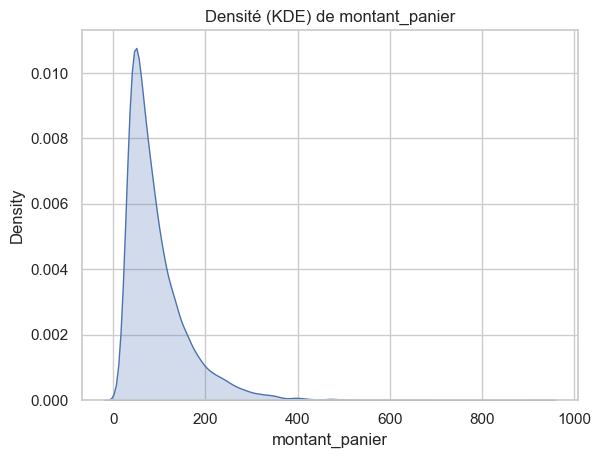

In [10]:

#  Densité (KDE) si seaborn est disponible

if sns is not None:
    plt.figure()
    sns.kdeplot(serie, fill=True)
    plt.title(f"Densité (KDE) de {variable}")
    plt.xlabel(variable)
    plt.show()
else:
    print("Seaborn n'est pas installé, KDE non tracé.")


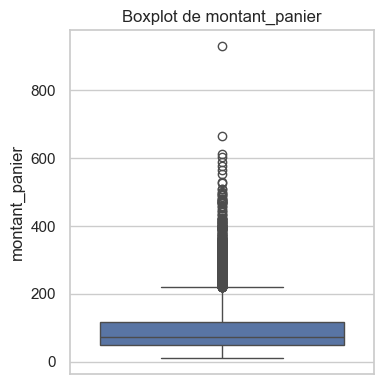

In [16]:

#  Boxplot
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

plt.figure(figsize=(4, 4))
sns.boxplot(y=serie, color="#4C72B0")

plt.title(f"Boxplot de {variable}")
plt.ylabel(variable)
plt.tight_layout()
plt.show()






##  1.2 — Variable qualitative

Une **variable qualitative** décrit des catégories : sexe, produit, canal d'achat, etc.

On distingue :
- les variables **nominales** (sans ordre naturel : couleur, pays…)  
- les variables **ordinales** (avec ordre logique : faible/moyen/fort, notes 1–5…)

| **Catégorie** | **Indicateurs / Outils** | **Description / Interprétation** |
|---------------|---------------------------|----------------------------------|
| **Type de variable** | **Nominale** | Catégories sans ordre (ex : pays, produit, couleur) |
| | **Ordinale** | Catégories ordonnées (ex : niveau 1–5, faible/moyen/fort) |
| **Fréquences** | **Effectifs** | Nombre d’observations par modalité |
| | **Proportions (%)** | Fréquences relatives, interprétation intuitive |
| | **Fréquences cumulées** | Utile pour variables ordinales |
| **Mesures adaptées** | **Mode** | Modalité la plus fréquente |
| | **Diversité / richesse** | Nombre total de catégories distinctes |
| | **Indice de concentration** | Mesure si quelques catégories dominent |
| **Visualisations** | **Barplot (vertical)** | Comparaison des effectifs |
| | **Barplot horizontal** | Idéal si plus de 5 catégories |
| | **Pie chart** | Proportions (à utiliser avec prudence) |
| | **Countplot (seaborn)** | Version graphique automatique de value_counts() |
| | **Treemap** | Représentation visuelle de la répartition |


## À retenir  
Une analyse univariée qualitative répond à 4 questions clés :

1. **Quel est le type de variable ?** → nominale ou ordinale  
2. **Comment se répartissent les catégories ?** → effectifs, proportions  
3. **Quelle catégorie domine ?** → mode, concentration  
4. **Comment visualiser efficacement ?** → barplot, countplot, treemap, pie chart (rarement)



Pour illustrer, nous allons utiliser la variable **`canal_achat`**.


In [17]:

# Variable qualitative à analyser
var_quali = "canal_achat"
serie_quali = df[var_quali].astype("category")

serie_quali.head()


0    Mobile
1    Mobile
2    Mobile
3    Mobile
4    Mobile
Name: canal_achat, dtype: category
Categories (4, object): ['App', 'Desktop', 'Email', 'Mobile']


###  Effectifs et proportions

Pour décrire une variable qualitative, on regarde :
- les **effectifs** (nombre d'observations par modalité) ;
- les **proportions** ou **pourcentages**.


In [18]:

# ⚙️ Effectifs
effectifs = serie_quali.value_counts()
effectifs


canal_achat
Mobile     6030
Desktop    4418
Email      3042
App        1510
Name: count, dtype: int64

In [19]:

# ⚙️ Proportions (en %)
proportions = serie_quali.value_counts(normalize=True) * 100
proportions.round(2)


canal_achat
Mobile     40.20
Desktop    29.45
Email      20.28
App        10.07
Name: proportion, dtype: float64


###  Graphiques : barplot, pie chart


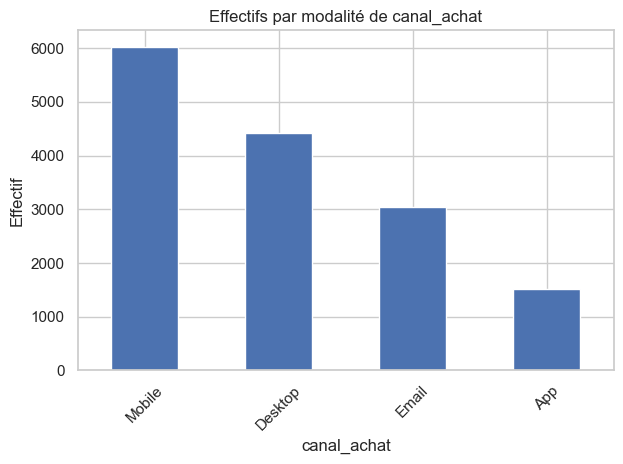

In [20]:

#  Diagramme en barres (barplot)

plt.figure()
effectifs.plot(kind="bar")
plt.title(f"Effectifs par modalité de {var_quali}")
plt.xlabel(var_quali)
plt.ylabel("Effectif")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


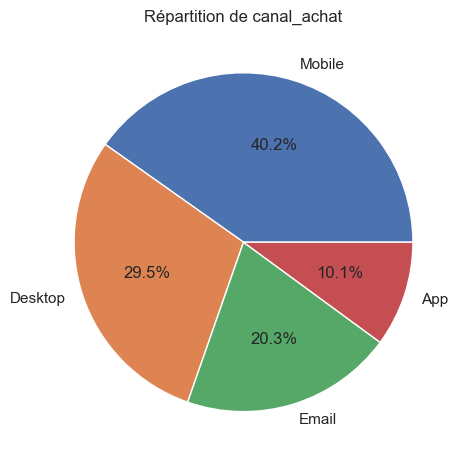

In [21]:

# Diagramme circulaire (pie chart)

plt.figure()
proportions.plot(kind="pie", autopct="%1.1f%%")
plt.title(f"Répartition de {var_quali}")
plt.ylabel("")  # on enlève le label par défaut
plt.tight_layout()
plt.show()



##  Tests de normalité

Dans beaucoup de méthodes statistiques (tests paramétriques, régressions, etc.), on suppose qu’une variable suit **approximativement une loi normale**.

Il est donc utile de :
- **visualiser** la distribution ;
- utiliser des **tests de normalité** :
  - Shapiro–Wilk ;
  - Kolmogorov–Smirnov (KS) ;
- examiner un **Q-Q plot (quantile-quantile)**.



###  Test de Shapiro–Wilk

- **Hypothèse nulle H0** : la variable suit une loi normale ;
- **Hypothèse alternative H1** : la variable ne suit pas une loi normale.

On regarde la **p-valeur** :
- si p-valeur < 0,05 → on **rejette H0** → la variable n'est **pas normale** (au seuil de 5%) ;
- si p-valeur ≥ 0,05 → on **ne rejette pas H0** → la normalité est **plausible**.


In [22]:

# ⚙️ Test de Shapiro–Wilk sur la variable quantitative choisie

shapiro_stat, shapiro_p = stats.shapiro(serie.sample(min(len(serie), 500), random_state=42))
print(f"Statistique de Shapiro–Wilk : {shapiro_stat:.4f}")
print(f"p-valeur : {shapiro_p:.4f}")


Statistique de Shapiro–Wilk : 0.8706
p-valeur : 0.0000



### Test de Kolmogorov–Smirnov (KS)

On peut comparer la distribution observée à une loi normale **théorique** (même moyenne et même écart-type).

Là encore, on raisonne en termes de **p-valeur** :
- p-valeur faible → la distribution observée est **très différente** de la normale ;
- p-valeur élevée → pas de différence significative détectée.


In [23]:

# Test de Kolmogorov–Smirnov (KS) avec une normale théorique

# On standardise la série (pour la comparer à une N(0, 1))
serie_std = (serie - serie.mean()) / serie.std(ddof=1)

ks_stat, ks_p = stats.kstest(serie_std, "norm")
print(f"Statistique de KS : {ks_stat:.4f}")
print(f"p-valeur : {ks_p:.4f}")


Statistique de KS : 0.1388
p-valeur : 0.0000



###  Q-Q plot (Quantile-Quantile plot)

Le **Q-Q plot** compare les quantiles de la distribution observée à ceux d’une loi normale.

- Si les points sont **proches d’une droite**, la normalité est plausible ;
- Si les points s’écartent fortement (surtout dans les queues), la distribution n’est pas normale.


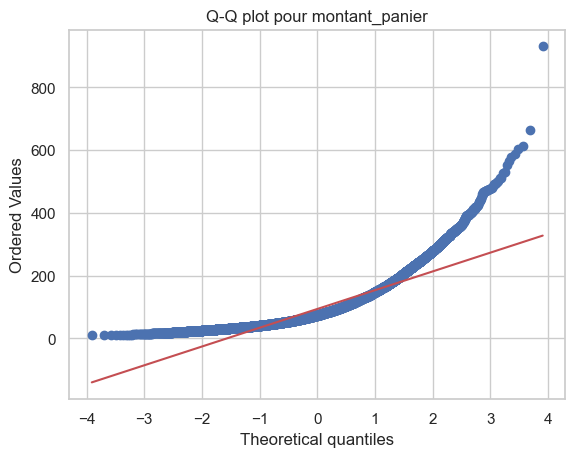

In [24]:

# Q-Q plot

plt.figure()
stats.probplot(serie, dist="norm", plot=plt)
plt.title(f"Q-Q plot pour {variable}")
plt.show()



###  Décision : normal ou pas ?

En pratique, on combine :

- la **forme des graphiques** (histogramme, KDE, Q-Q plot) ;
- les **statistiques descriptives** (skewness, kurtosis) ;
- les **tests de normalité** (p-valeurs).

**Règle pratique :**
- si la distribution est visuellement proche d’une cloche,  
- skewness et kurtosis pas trop extrêmes,  
- p-valeurs des tests pas trop faibles (par ex. > 0,05),  

alors on peut **approximer** la variable par une loi normale et utiliser des **tests paramétriques**.

Sinon, mieux vaut envisager :
- des **transformations** (log, sqrt, etc.) ;
- ou des méthodes / tests **non paramétriques** (ex. : test de Wilcoxon, test de Mann–Whitney, etc.).




##  Récapitulatif de la Partie 1 — Statistique univariée

Nous avons vu comment, pour **une seule variable** :

- décrire le **niveau moyen** (moyenne, médiane, mode) ;
- mesurer la **dispersion** (variance, écart-type, étendue, coefficient de variation) ;
- utiliser les **quartiles** et l’**IQR** pour détecter des outliers ;
- analyser la **forme de la distribution** (skewness, kurtosis) ;
- décrire une **variable qualitative** (effectifs, proportions, barplot, pie chart) ;
- tester la **normalité** (Shapiro–Wilk, KS, Q-Q plot) et décider si une approximation normale est raisonnable.

Vous pouvez maintenant appliquer ces outils à d’autres variables du jeu de données :
- changez `variable` pour analyser `âge`, `revenu_mensuel`, `note_satisfaction`, etc. ;
- changez `var_quali` pour analyser `sexe`, `produit`, `segment_age`, etc.
